In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='pholed_model')
df = df[list(df.columns)[1:-1] + ['cd/A']]
df.dropna(axis=0, inplace=True)

X = df[list(df.columns)[:-1]]
y = df[['cd/A']]

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=196)

# filename = 'adaboost_model.sav'
filename = 'pholed_rf_model.sav'

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
print('R-squared: ', loaded_model.score(X_test, y_test))

R-squared:  0.921424143957


In [3]:
new_df = pd.read_pickle('C:/Anaconda3/projects/oled/fix triplet host and HTL homo/generated.pkl')

new_X = new_df[:]

y_pred = loaded_model.predict(new_X)
y_pred = [round(float(i), 2) for i in y_pred]

new_X['cd/a'] = y_pred
new_X.head()

triplet3 = new_X.loc[new_X['triplet_HOST'] == 3]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

In [10]:
HTL = {'total': triplet3['cd/a'], '50': device50['cd/a'], '45': device45['cd/a'] , '40': device40['cd/a'] , '35': device35['cd/a'] , 
       '30': device30['cd/a'] , '25': device25['cd/a'], '15': device20['cd/a'], '10': device10['cd/a']
      , '0': device['cd/a']}
sequence = ['total', '50', '45', '40', '35', '30', '25', '15', '10', '0']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

df.describe()

,total,50,45,40,35,30,25,15,10,0
count,465120.000000,2783.000000,41165.000000,96235.000000,24562.000000,197778.000000,29157.000000,440.000000,9816.000000,63184.000000
mean,32.267169,50.673399,46.219524,43.399416,36.647008,32.503085,29.067703,15.804659,11.397272,7.803187
std,11.785818,0.843074,1.385221,1.220911,1.669399,1.283909,0.745684,0.572626,1.381047,1.133023
min,4.730000,50.000000,45.000000,40.000000,35.000000,30.000000,25.810000,15.000000,10.000000,4.730000
25%,30.500000,50.140000,45.300000,42.790000,35.340000,31.500000,28.620000,15.257500,10.290000,6.890000
50%,33.130000,50.320000,45.720000,43.670000,35.880000,32.530000,29.250000,15.770000,10.830000,7.680000
75%,42.790000,50.720000,46.390000,44.350000,38.080000,33.510000,29.670000,16.210000,12.310000,8.750000
max,53.720000,53.720000,49.990000,44.990000,39.990000,34.990000,29.990000,17.530000,14.990000,9.990000


,50,45,40,35,30,25,15,10,0
count,357.000000,6588.000000,16016.000000,3430.000000,32226.000000,6663.000000,272.000000,2926.000000,9042.000000
mean,2.355910,2.334217,2.229851,2.298816,2.288063,2.073745,2.289706,2.306220,2.240765
std,0.117052,0.148229,0.207238,0.179575,0.178318,0.212162,0.183238,0.175414,0.204035
min,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000
25%,2.400000,2.260000,2.000000,2.200000,2.200000,1.900000,2.200000,2.200000,2.000000
50%,2.400000,2.400000,2.260000,2.400000,2.400000,2.000000,2.400000,2.400000,2.260000
75%,2.400000,2.400000,2.400000,2.400000,2.400000,2.200000,2.400000,2.400000,2.400000
max,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000


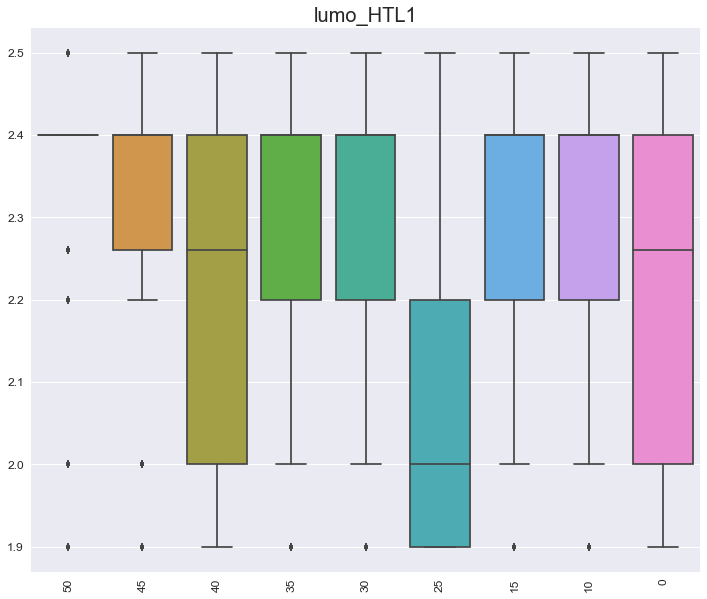

In [22]:
def layer(name): 
    column = name
    HTL = {'50': device50[column], '45': device45[column] , '40': device40[column] , '35': device35[column] , 
           '30': device30[column] , '25': device25[column], '15': device20[column], '10': device10[column], 
           '0': device[column]}
    sequence = ['50', '45', '40', '35', '30', '25', '15', '10', '0']
    df = pd.DataFrame(data=HTL).reindex(columns=sequence)

    # boxplot
    f, ax = plt.subplots(figsize=(12, 10))
    fig = sns.boxplot(data=df)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(name, fontsize=20);
    return df.describe()

layer('lumo_HTL1')

,50,45,40,35,30,25,15,10,0
count,357.000000,6588.000000,16016.000000,3430.000000,32226.000000,6663.000000,272.000000,2926.000000,9042.000000
mean,5.838375,5.818169,5.674132,5.776064,5.758201,5.439742,5.747059,5.746958,5.700310
std,0.188312,0.182003,0.247545,0.247463,0.189843,0.290383,0.204359,0.218923,0.248997
min,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000
25%,5.800000,5.800000,5.700000,5.800000,5.800000,5.100000,5.800000,5.700000,5.700000
50%,5.800000,5.800000,5.800000,5.800000,5.800000,5.500000,5.800000,5.800000,5.800000
75%,5.900000,5.800000,5.800000,5.800000,5.800000,5.800000,5.800000,5.800000,5.800000
max,6.100000,6.100000,6.100000,6.100000,6.100000,5.900000,6.100000,6.100000,6.100000


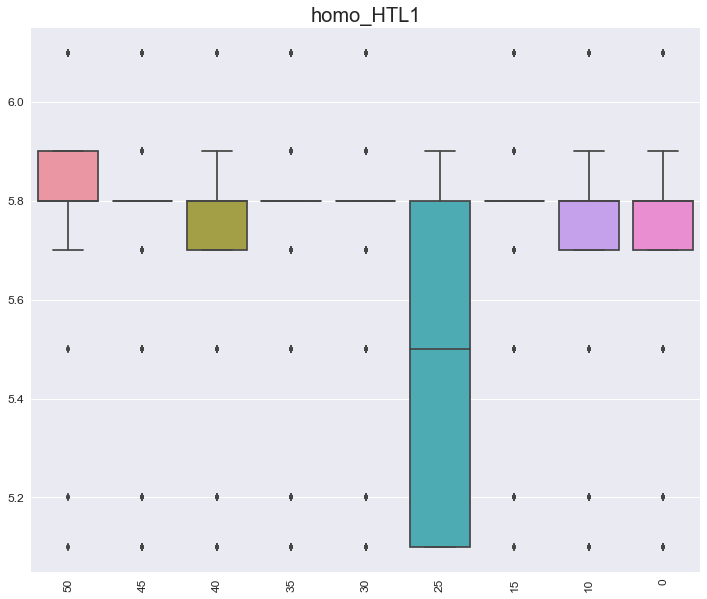

In [23]:
layer('homo_HTL1')

,50,45,40,35,30,25,15,10,0
count,357.000000,6588.000000,16016.000000,3430.000000,32226.000000,6663.000000,272.00000,2926.000000,9042.000000
mean,2.851933,2.801425,2.751163,2.784679,2.770339,2.697144,2.79500,2.756822,2.763360
std,0.158103,0.205365,0.223775,0.200336,0.226041,0.192740,0.22615,0.242130,0.212469
min,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.30000,2.300000,2.300000
25%,2.800000,2.800000,2.580000,2.670000,2.580000,2.670000,2.67000,2.580000,2.670000
50%,2.940000,2.800000,2.870000,2.800000,2.870000,2.670000,2.87000,2.870000,2.800000
75%,2.940000,2.940000,2.940000,2.940000,2.940000,2.870000,2.95500,2.940000,2.940000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000


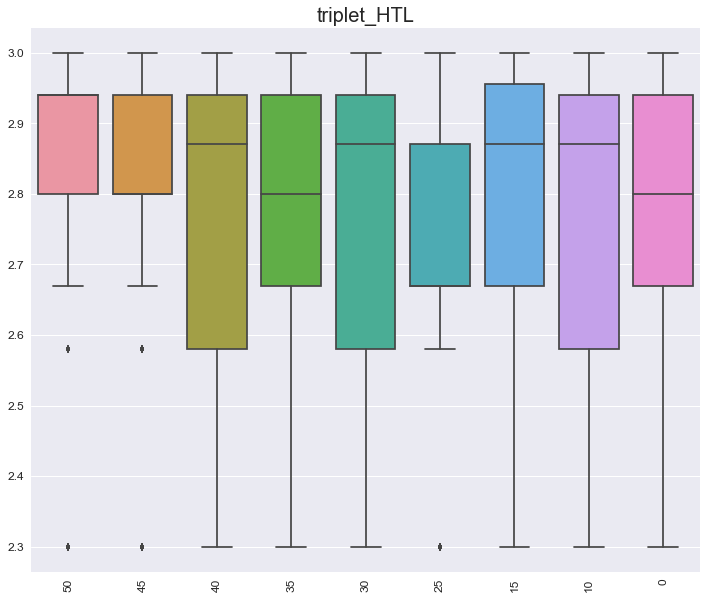

In [25]:
layer('triplet_HTL')

,50,45,40,35,30,25,15,10,0
count,3.570000e+02,6588.000000,16016.000000,3430.000000,32226.000000,6663.000000,272.000000,2926.000000,9042.000000
mean,3.470000e+00,2.735779,2.848987,2.992201,2.727031,2.871977,3.112500,3.133869,3.088664
std,2.134620e-14,0.368521,0.305506,0.449899,0.260450,0.245069,0.297824,0.299842,0.291689
min,3.470000e+00,2.260000,2.260000,2.260000,2.260000,2.260000,2.800000,2.800000,2.800000
25%,3.470000e+00,2.500000,2.700000,2.520000,2.520000,2.730000,2.800000,2.800000,2.800000
50%,3.470000e+00,2.700000,2.750000,2.750000,2.700000,2.880000,3.000000,3.000000,3.000000
75%,3.470000e+00,2.750000,2.910000,3.470000,2.880000,2.910000,3.500000,3.500000,3.500000
max,3.470000e+00,3.470000,3.470000,3.470000,3.320000,3.320000,3.500000,3.500000,3.500000


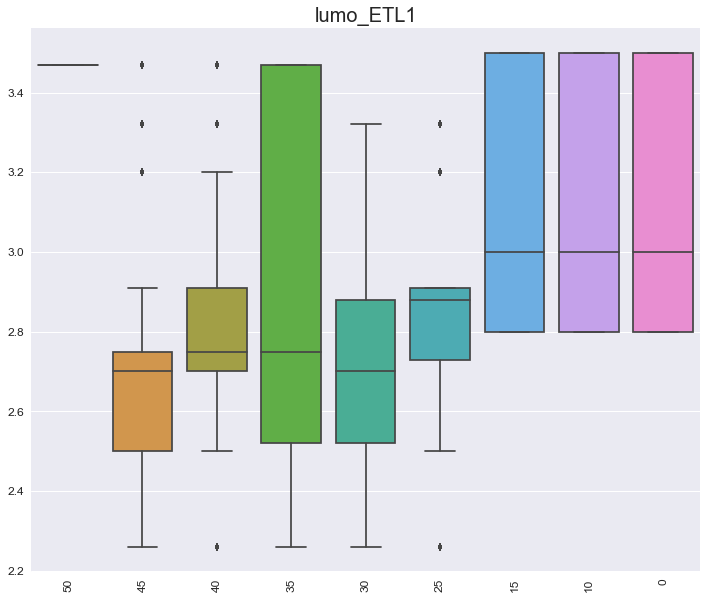

In [26]:
layer('lumo_ETL1')

,50,45,40,35,30,25,15,10,0
count,357.0,6588.000000,16016.000000,3430.000000,32226.000000,6663.000000,272.000000,2926.000000,9042.000000
mean,7.5,6.602547,6.530046,6.975945,6.456981,6.376700,6.547794,6.572317,6.520283
std,0.0,0.496368,0.428186,0.520264,0.341576,0.340168,0.344159,0.347040,0.336541
min,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,6.200000,6.200000,6.200000
25%,7.5,6.130000,6.120000,6.560000,6.122500,6.020000,6.200000,6.200000,6.200000
50%,7.5,6.500000,6.560000,6.800000,6.500000,6.500000,6.400000,6.400000,6.400000
75%,7.5,6.800000,6.790000,7.500000,6.790000,6.670000,7.000000,7.000000,7.000000
max,7.5,7.500000,7.500000,7.500000,7.000000,7.000000,7.000000,7.000000,7.000000


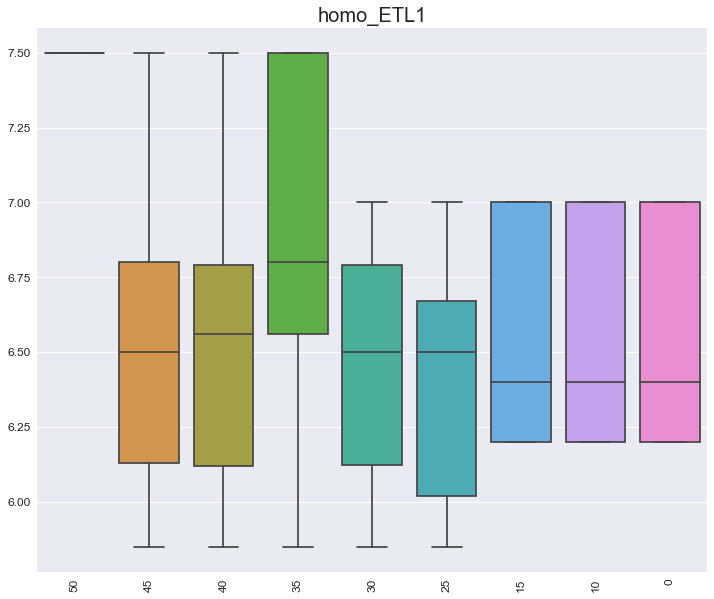

In [27]:
layer('homo_ETL1')

,50,45,40,35,30,25,15,10,0
count,3.570000e+02,6588.000000,16016.000000,3430.000000,32226.000000,6663.000000,272.000000,2926.000000,9042.000000
mean,2.990000e+00,2.885345,2.836895,2.959994,2.839988,2.787992,2.567279,2.567635,2.566335
std,7.560112e-15,0.245585,0.201490,0.226909,0.228693,0.138598,0.047006,0.046795,0.047259
min,2.990000e+00,2.690000,2.690000,2.690000,2.690000,2.690000,2.500000,2.500000,2.500000
25%,2.990000e+00,2.700000,2.700000,2.750000,2.700000,2.700000,2.500000,2.500000,2.500000
50%,2.990000e+00,2.760000,2.750000,2.990000,2.750000,2.750000,2.600000,2.600000,2.600000
75%,2.990000e+00,2.990000,2.950000,2.990000,2.800000,2.800000,2.600000,2.600000,2.600000
max,2.990000e+00,3.400000,3.400000,3.400000,3.400000,3.400000,2.600000,2.600000,2.600000


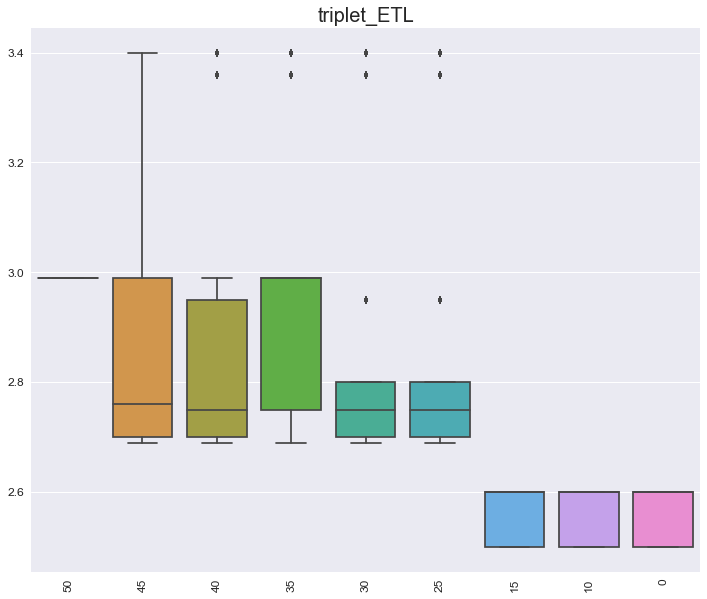

In [28]:
layer('triplet_ETL')

,50,45,40,35,30,25,15,10,0
count,357.000000,6588.000000,16016.000000,3430.000000,32226.000000,6663.000000,2.720000e+02,2926.000000,9042.000000
mean,2.385658,2.407089,2.425165,2.423566,2.420260,2.407570,2.400000e+00,2.538681,2.380604
std,0.195501,0.216865,0.265550,0.220234,0.258085,0.224479,1.201251e-14,0.281023,0.231178
min,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,2.400000e+00,2.020000,2.020000
25%,2.300000,2.300000,2.270000,2.300000,2.280000,2.280000,2.400000e+00,2.400000,2.270000
50%,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000e+00,2.400000,2.300000
75%,2.460000,2.460000,2.550000,2.460000,2.460000,2.550000,2.400000e+00,2.950000,2.460000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.400000e+00,3.000000,3.000000


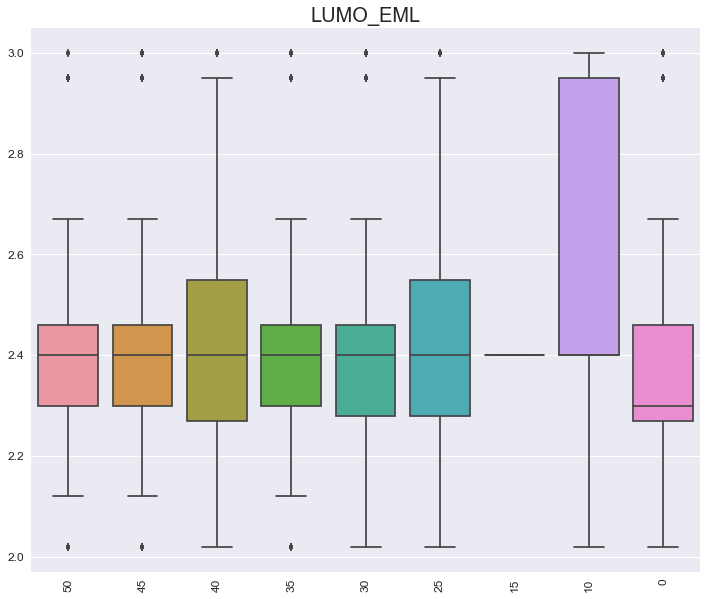

In [29]:
layer('LUMO_EML')

,50,45,40,35,30,25,15,10,0
count,357.000000,6588.000000,16016.000000,3430.000000,32226.000000,6663.000000,272.0,2926.000000,9042.000000
mean,6.175294,6.093641,5.832512,6.221283,5.886750,5.829623,7.5,6.130684,5.787571
std,0.722473,0.636716,0.253685,0.749680,0.382619,0.121052,0.0,0.596797,0.116921
min,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,7.5,5.560000,5.560000
25%,5.710000,5.800000,5.700000,5.710000,5.710000,5.800000,7.5,5.860000,5.700000
50%,5.860000,5.860000,5.800000,5.860000,5.850000,5.900000,7.5,5.900000,5.800000
75%,6.060000,5.900000,5.900000,7.500000,5.900000,5.900000,7.5,6.060000,5.900000
max,7.500000,7.500000,7.500000,7.500000,7.500000,6.060000,7.5,7.500000,6.060000


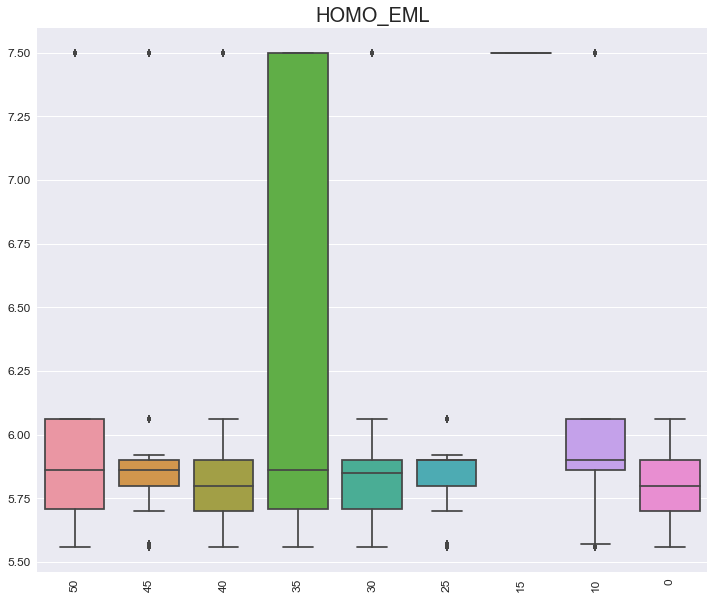

In [30]:
layer('HOMO_EML')

In [37]:
new_X.columns

Index(['homo_HIL', 'thick_HIL', 'lumo_HTL1', 'homo_HTL1', 'thickness_HTL1',
       'lumo_HTL2', 'homo_HTL2', 'thickness_HTL2', 'lumo_HTL3', 'homo_HTL3',
       'thickness_HTL3', 'total_HTL_thickness', 'triplet_HTL', 'LUMO_EML',
       'HOMO_EML', 'triplet_HOST', 'thickness_EML', 'lumo_dopant',
       'homo_dopant', 'triplet_dopant', 'dopant_percentage', 'triplet_ETL',
       'total ETL', 'lumo_ETL1', 'homo_ETL1', 'thickness_ETL1', 'lumo_ETL2',
       'homo_ETL2', 'thickness_ETL2', 'wf_1', 'thickness_EIL', 'cd/a'],
      dtype='object')

In [38]:
triplet3 = new_X.loc[new_X['triplet_HOST'] == 2.95]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,15,10,0
count,505.000000,9793.000000,13441.000000,7958.000000,31525.000000,2058.000000,126.000000,2160.000000,9954.000000
mean,2.303842,2.307561,2.224330,2.325974,2.253372,2.023003,2.330794,2.320324,2.242940
std,0.153872,0.160758,0.213947,0.146987,0.199219,0.212958,0.141685,0.175569,0.201688
min,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000
25%,2.260000,2.260000,2.000000,2.260000,2.000000,1.900000,2.260000,2.260000,2.000000
50%,2.400000,2.400000,2.260000,2.400000,2.260000,1.900000,2.400000,2.400000,2.260000
75%,2.400000,2.400000,2.400000,2.400000,2.400000,2.000000,2.400000,2.400000,2.400000
max,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000


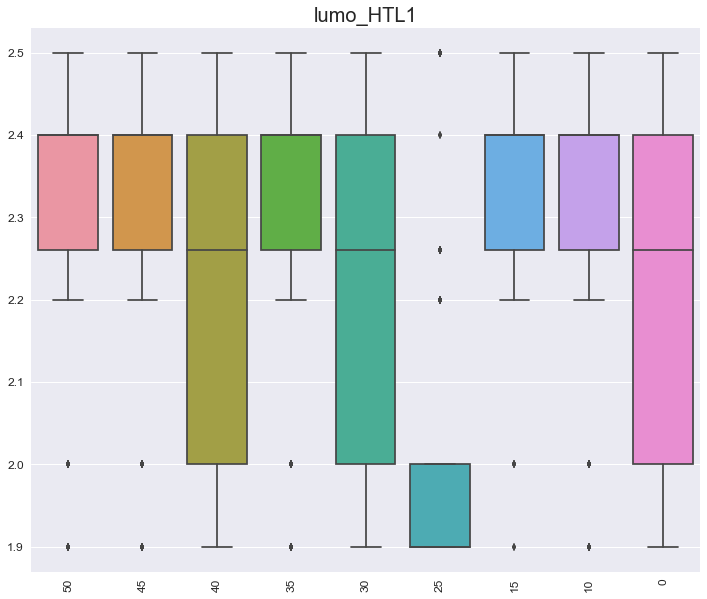

In [39]:
layer('lumo_HTL1')

,50,45,40,35,30,25,15,10,0
count,505.000000,9793.000000,13441.000000,7958.00000,31525.000000,2058.000000,126.000000,2160.000000,9954.000000
mean,5.816238,5.804881,5.653709,5.81342,5.712155,5.246453,5.797619,5.746620,5.704018
std,0.169188,0.166975,0.260002,0.18669,0.224992,0.211919,0.118972,0.235536,0.243781
min,5.100000,5.100000,5.100000,5.10000,5.100000,5.100000,5.200000,5.100000,5.100000
25%,5.800000,5.800000,5.500000,5.80000,5.700000,5.100000,5.800000,5.700000,5.700000
50%,5.800000,5.800000,5.800000,5.80000,5.800000,5.100000,5.800000,5.800000,5.800000
75%,5.800000,5.800000,5.800000,5.80000,5.800000,5.500000,5.800000,5.800000,5.800000
max,6.100000,6.100000,6.100000,6.10000,6.100000,5.800000,6.100000,6.100000,6.100000


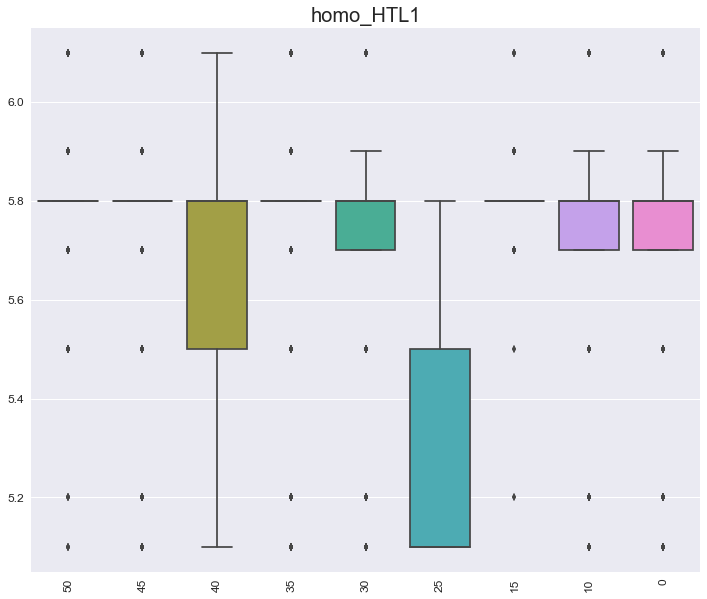

In [40]:
layer('homo_HTL1')

,50,45,40,35,30,25,15,10,0
count,505.000000,9793.000000,13441.00000,7958.000000,31525.000000,2058.000000,126.000000,2160.000000,9954.000000
mean,2.852455,2.798730,2.74035,2.806575,2.754864,2.659227,2.789524,2.753375,2.764138
std,0.150563,0.204305,0.22706,0.198252,0.226358,0.175696,0.238293,0.253661,0.212054
min,2.300000,2.300000,2.30000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000
25%,2.800000,2.670000,2.58000,2.800000,2.580000,2.670000,2.580000,2.580000,2.670000
50%,2.940000,2.870000,2.80000,2.870000,2.870000,2.670000,2.940000,2.870000,2.800000
75%,2.940000,2.940000,2.94000,2.940000,2.940000,2.670000,2.940000,2.940000,2.940000
max,3.000000,3.000000,3.00000,3.000000,3.000000,2.940000,3.000000,3.000000,3.000000


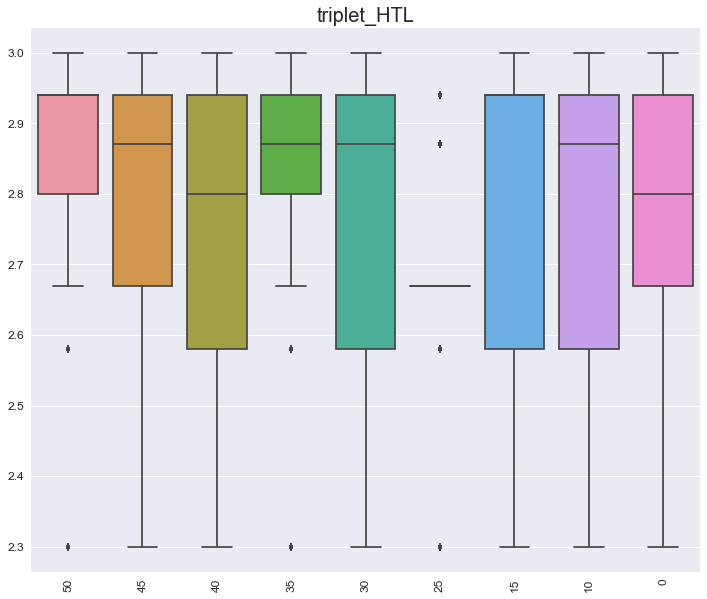

In [41]:
layer('triplet_HTL')

,50,45,40,35,30,25,15,10,0
count,5.050000e+02,9793.000000,13441.000000,7958.000000,31525.000000,2058.000000,126.000000,2160.000000,9954.00000
mean,3.470000e+00,2.685369,2.941817,2.694473,2.766718,2.875355,3.188889,3.155046,3.08693
std,2.311554e-14,0.310736,0.321967,0.308649,0.268548,0.217165,0.306522,0.303252,0.29073
min,3.470000e+00,2.260000,2.260000,2.260000,2.260000,2.260000,2.800000,2.800000,2.80000
25%,3.470000e+00,2.500000,2.730000,2.500000,2.600000,2.730000,3.000000,2.800000,2.80000
50%,3.470000e+00,2.600000,2.880000,2.600000,2.730000,2.880000,3.000000,3.000000,3.00000
75%,3.470000e+00,2.730000,3.200000,2.730000,2.880000,2.910000,3.500000,3.500000,3.50000
max,3.470000e+00,3.470000,3.470000,3.470000,3.320000,3.320000,3.500000,3.500000,3.50000


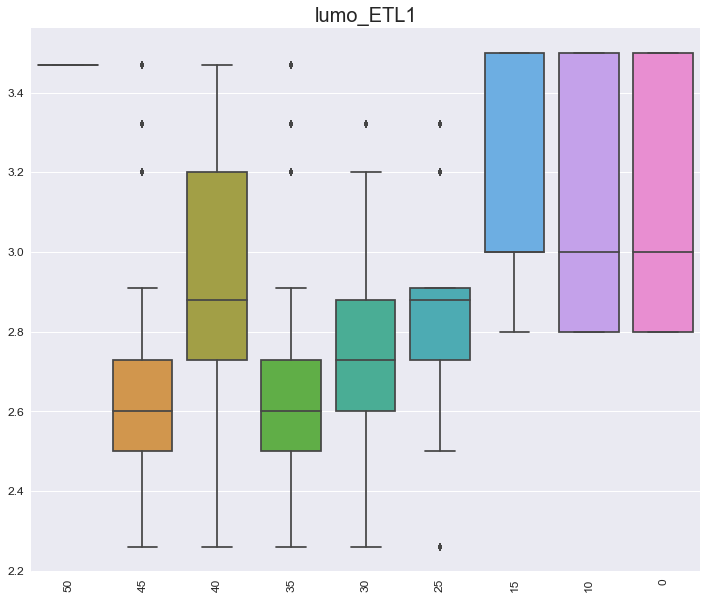

In [42]:
layer('lumo_ETL1')

,50,45,40,35,30,25,15,10,0
count,505.0,9793.000000,13441.000000,7958.000000,31525.000000,2058.000000,126.000000,2160.000000,9954.000000
mean,7.5,6.553200,6.594175,6.630304,6.435452,6.327259,6.636508,6.597037,6.518204
std,0.0,0.436012,0.492838,0.410912,0.344521,0.316180,0.355438,0.351257,0.335430
min,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,6.200000,6.200000,6.200000
25%,7.5,6.130000,6.120000,6.500000,6.120000,6.020000,6.400000,6.200000,6.200000
50%,7.5,6.500000,6.560000,6.790000,6.500000,6.300000,6.400000,6.400000,6.400000
75%,7.5,6.800000,6.800000,6.800000,6.680000,6.560000,7.000000,7.000000,7.000000
max,7.5,7.500000,7.500000,7.500000,7.000000,7.000000,7.000000,7.000000,7.000000


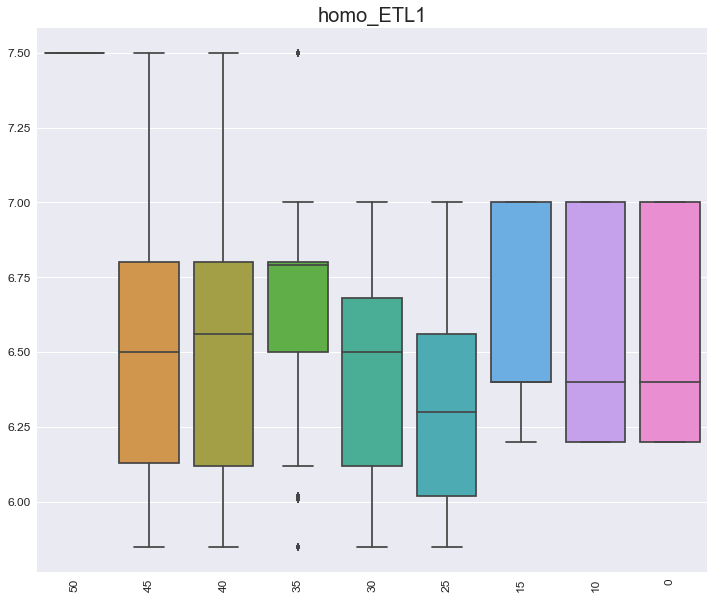

In [43]:
layer('homo_ETL1')

,50,45,40,35,30,25,15,10,0
count,5.050000e+02,9793.000000,13441.000000,7958.000000,31525.000000,2058.000000,126.000000,2160.000000,9954.000000
mean,2.990000e+00,2.883781,2.833657,2.928272,2.820939,2.765355,2.572222,2.569444,2.565994
std,8.001532e-15,0.258636,0.172734,0.283645,0.202747,0.095766,0.044969,0.046075,0.047375
min,2.990000e+00,2.690000,2.690000,2.690000,2.690000,2.690000,2.500000,2.500000,2.500000
25%,2.990000e+00,2.700000,2.700000,2.700000,2.700000,2.700000,2.500000,2.500000,2.500000
50%,2.990000e+00,2.750000,2.750000,2.760000,2.750000,2.750000,2.600000,2.600000,2.600000
75%,2.990000e+00,2.990000,2.950000,3.360000,2.800000,2.750000,2.600000,2.600000,2.600000
max,2.990000e+00,3.400000,3.400000,3.400000,3.400000,3.400000,2.600000,2.600000,2.600000


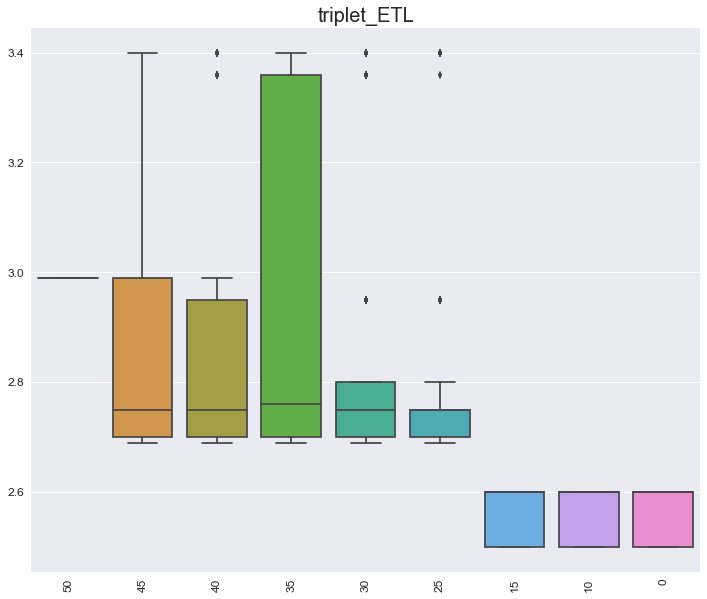

In [44]:
layer('triplet_ETL')

,50,45,40,35,30,25,15,10,0
count,505.000000,9793.000000,13441.000000,7958.00000,31525.000000,2058.000000,126.0,2160.000000,9954.000000
mean,2.373822,2.400778,2.431583,2.41746,2.418653,2.440287,2.4,2.491556,2.403279
std,0.181638,0.230982,0.265746,0.24092,0.254870,0.219299,0.0,0.257009,0.248179
min,2.020000,2.020000,2.020000,2.02000,2.020000,2.020000,2.4,2.020000,2.020000
25%,2.300000,2.280000,2.270000,2.30000,2.270000,2.300000,2.4,2.400000,2.270000
50%,2.400000,2.400000,2.400000,2.40000,2.400000,2.400000,2.4,2.400000,2.300000
75%,2.460000,2.460000,2.550000,2.46000,2.550000,2.550000,2.4,2.550000,2.460000
max,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.4,3.000000,3.000000


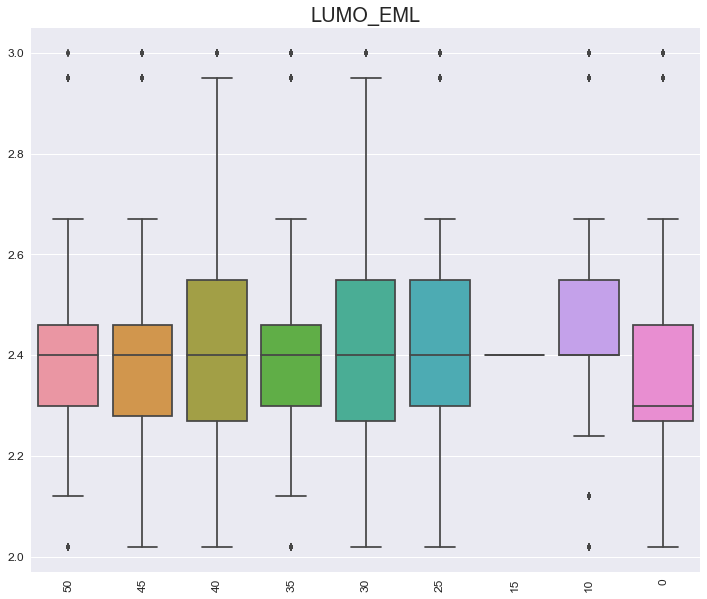

In [45]:
layer('LUMO_EML')

,50,45,40,35,30,25,15,10,0
count,505.000000,9793.000000,13441.000000,7958.000000,31525.000000,2058.000000,126.0,2160.000000,9954.000000
mean,6.053327,6.002047,5.835994,6.131399,5.853105,5.860943,7.5,6.310981,5.799968
std,0.638996,0.563943,0.238385,0.730990,0.272709,0.102537,0.0,0.742632,0.124393
min,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,7.5,5.560000,5.560000
25%,5.700000,5.710000,5.710000,5.700000,5.710000,5.800000,7.5,5.860000,5.700000
50%,5.850000,5.850000,5.850000,5.800000,5.850000,5.900000,7.5,5.900000,5.800000
75%,5.900000,5.900000,5.900000,5.900000,5.900000,5.900000,7.5,7.500000,5.900000
max,7.500000,7.500000,7.500000,7.500000,7.500000,6.060000,7.5,7.500000,6.060000


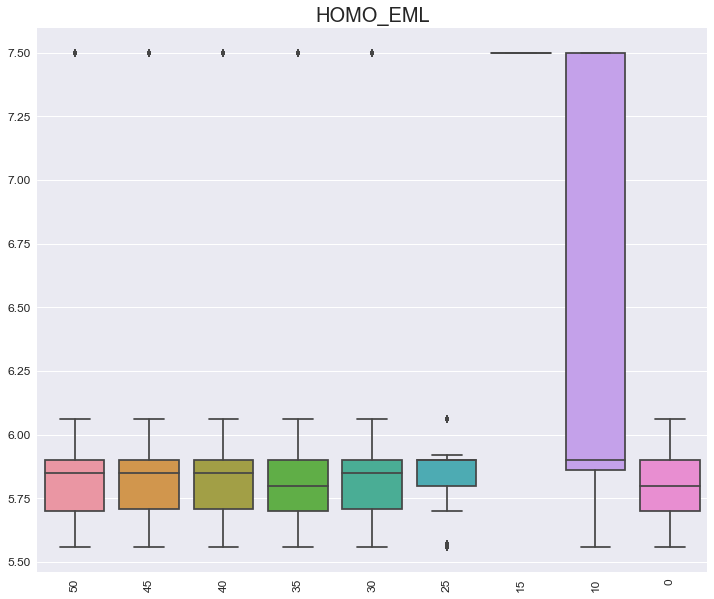

In [46]:
layer('HOMO_EML')

In [47]:
triplet3 = new_X.loc[new_X['triplet_HOST'] == 2.9]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,15,10,0
count,570.000000,8540.000000,18400.000000,3816.000000,40202.000000,5272.000000,40.000000,1733.000000,12627.000000
mean,2.306421,2.294951,2.242572,2.287416,2.267485,2.145850,2.383500,2.338038,2.246047
std,0.151014,0.165888,0.208681,0.179467,0.187779,0.262956,0.087341,0.172624,0.200077
min,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,2.200000,1.900000,1.900000
25%,2.260000,2.200000,2.000000,2.200000,2.200000,1.900000,2.400000,2.260000,2.000000
50%,2.400000,2.400000,2.260000,2.400000,2.400000,2.000000,2.400000,2.400000,2.260000
75%,2.400000,2.400000,2.400000,2.400000,2.400000,2.500000,2.400000,2.400000,2.400000
max,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000


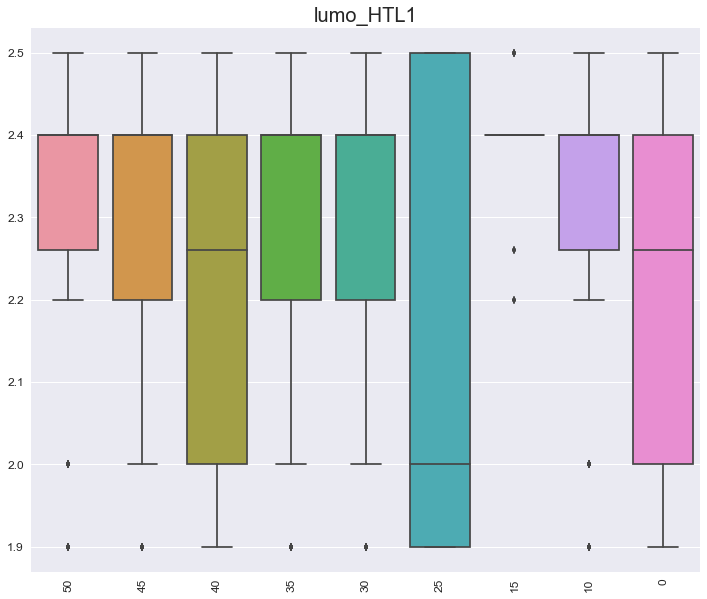

In [48]:
layer('lumo_HTL1')

,50,45,40,35,30,25,15,10,0
count,570.000000,8540.000000,18400.000000,3816.000000,40202.000000,5272.000000,40.000000,1733.000000,12627.000000
mean,5.824912,5.808794,5.674522,5.768658,5.752592,5.330539,5.802500,5.742585,5.708086
std,0.164227,0.173873,0.251921,0.247658,0.193994,0.258853,0.047972,0.249152,0.241111
min,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.700000,5.100000,5.100000
25%,5.800000,5.800000,5.700000,5.800000,5.700000,5.100000,5.800000,5.700000,5.700000
50%,5.800000,5.800000,5.800000,5.800000,5.800000,5.200000,5.800000,5.800000,5.800000
75%,5.900000,5.800000,5.800000,5.800000,5.800000,5.500000,5.800000,5.800000,5.800000
max,6.100000,6.100000,6.100000,6.100000,6.100000,5.900000,5.900000,6.100000,6.100000


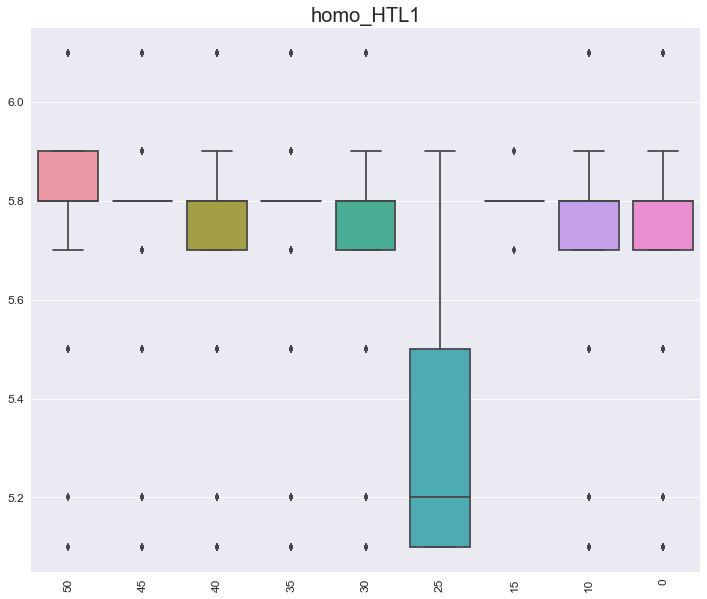

In [49]:
layer('homo_HTL1')

,50,45,40,35,30,25,15,10,0
count,570.000000,8540.000000,18400.000000,3816.000000,40202.000000,5272.000000,40.000000,1733.000000,12627.00000
mean,2.842982,2.803916,2.748784,2.782516,2.776344,2.614524,2.813500,2.736988,2.76584
std,0.159388,0.193238,0.228032,0.201982,0.215137,0.227761,0.270475,0.270768,0.21200
min,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.30000
25%,2.800000,2.670000,2.580000,2.670000,2.670000,2.300000,2.580000,2.580000,2.67000
50%,2.870000,2.870000,2.800000,2.800000,2.870000,2.670000,2.940000,2.800000,2.87000
75%,2.940000,2.940000,2.940000,2.940000,2.940000,2.870000,3.000000,3.000000,2.94000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000


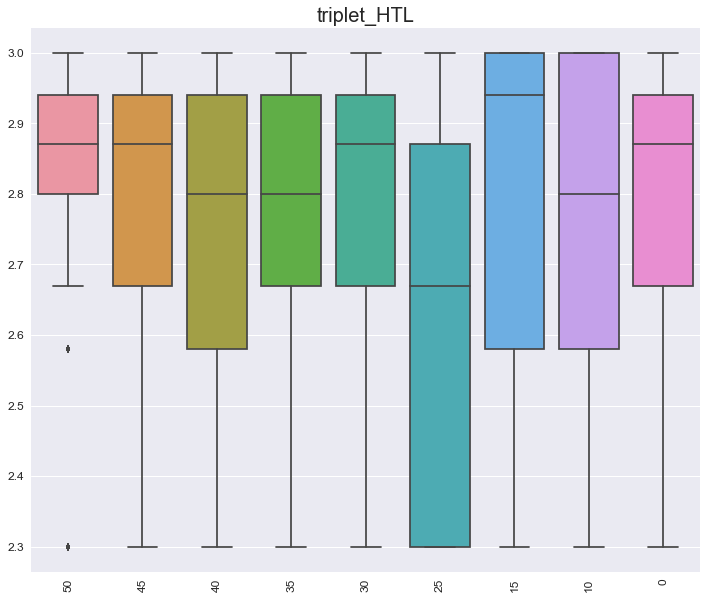

In [50]:
layer('triplet_HTL')

,50,45,40,35,30,25,15,10,0
count,5.700000e+02,8540.000000,18400.000000,3816.000000,40202.000000,5272.000000,40.000000,1733.000000,12627.000000
mean,3.470000e+00,2.696028,2.884007,2.901025,2.738853,2.859372,3.272500,3.145182,3.093253
std,2.355740e-14,0.342236,0.314653,0.437468,0.264807,0.226514,0.303811,0.302847,0.292502
min,3.470000e+00,2.260000,2.260000,2.260000,2.260000,2.260000,2.800000,2.800000,2.800000
25%,3.470000e+00,2.500000,2.700000,2.500000,2.520000,2.730000,3.000000,2.800000,2.800000
50%,3.470000e+00,2.600000,2.880000,2.700000,2.730000,2.880000,3.500000,3.000000,3.000000
75%,3.470000e+00,2.730000,3.200000,3.470000,2.880000,2.910000,3.500000,3.500000,3.500000
max,3.470000e+00,3.470000,3.470000,3.470000,3.320000,3.320000,3.500000,3.500000,3.500000


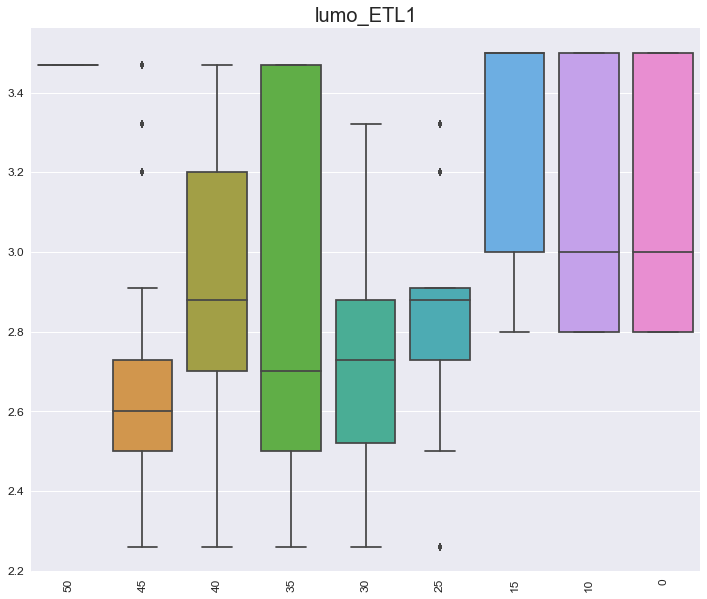

In [51]:
layer('lumo_ETL1')

,50,45,40,35,30,25,15,10,0
count,570.0,8540.000000,18400.000000,3816.000000,40202.000000,5272.000000,40.000000,1733.000000,12627.000000
mean,7.5,6.591929,6.550159,6.902463,6.455506,6.325292,6.735000,6.585690,6.525509
std,0.0,0.467374,0.455985,0.490127,0.341722,0.325675,0.351954,0.350556,0.337617
min,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,6.200000,6.200000,6.200000
25%,7.5,6.130000,6.120000,6.560000,6.120000,6.020000,6.400000,6.200000,6.200000
50%,7.5,6.670000,6.560000,6.800000,6.500000,6.300000,7.000000,6.400000,6.400000
75%,7.5,6.800000,6.800000,7.500000,6.790000,6.560000,7.000000,7.000000,7.000000
max,7.5,7.500000,7.500000,7.500000,7.000000,7.000000,7.000000,7.000000,7.000000


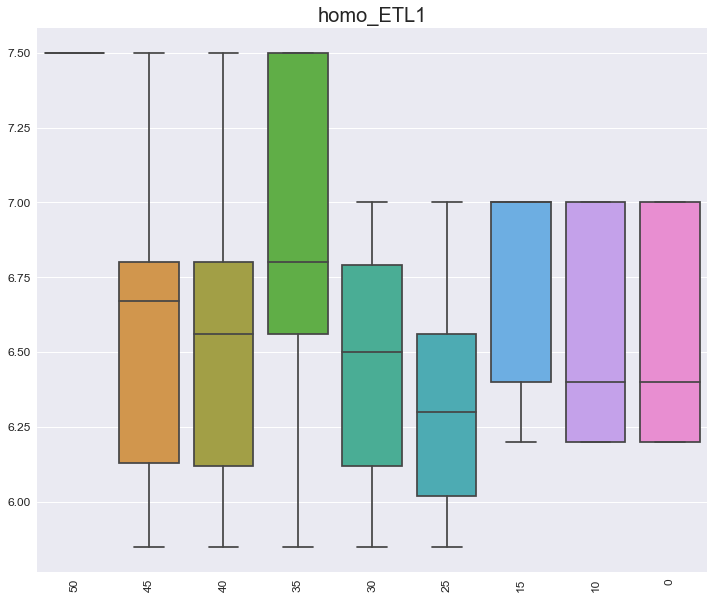

In [52]:
layer('homo_ETL1')

,50,45,40,35,30,25,15,10,0
count,5.700000e+02,8540.000000,18400.000000,3816.000000,40202.000000,5272.000000,40.000000,1733.000000,12627.000000
mean,2.990000e+00,2.898989,2.831371,2.968168,2.837388,2.767432,2.582500,2.569186,2.566271
std,8.000627e-15,0.262773,0.185854,0.252530,0.224274,0.100389,0.038481,0.046186,0.047280
min,2.990000e+00,2.690000,2.690000,2.690000,2.690000,2.690000,2.500000,2.500000,2.500000
25%,2.990000e+00,2.700000,2.700000,2.740000,2.700000,2.700000,2.600000,2.500000,2.500000
50%,2.990000e+00,2.760000,2.750000,2.990000,2.750000,2.750000,2.600000,2.600000,2.600000
75%,2.990000e+00,2.990000,2.950000,2.990000,2.800000,2.760000,2.600000,2.600000,2.600000
max,2.990000e+00,3.400000,3.400000,3.400000,3.400000,3.400000,2.600000,2.600000,2.600000


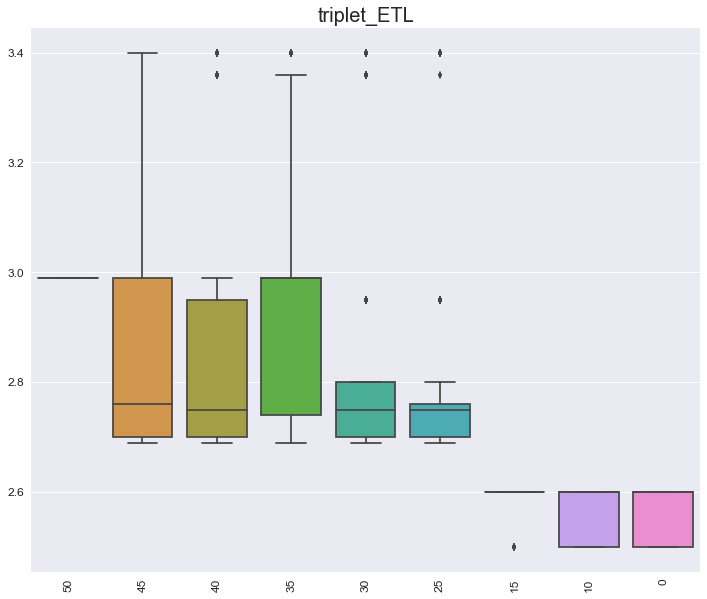

In [53]:
layer('triplet_ETL')

,50,45,40,35,30,25,15,10,0
count,570.00000,8540.000000,18400.000000,3816.000000,40202.000000,5272.000000,4.000000e+01,1733.000000,12627.000000
mean,2.37893,2.421629,2.424828,2.442786,2.421483,2.428135,2.400000e+00,2.488829,2.414608
std,0.20316,0.227178,0.238334,0.208946,0.239252,0.190511,1.349240e-15,0.221447,0.233560
min,2.02000,2.020000,2.020000,2.020000,2.020000,2.020000,2.400000e+00,2.020000,2.020000
25%,2.28000,2.300000,2.280000,2.400000,2.280000,2.300000,2.400000e+00,2.400000,2.280000
50%,2.40000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000e+00,2.400000,2.400000
75%,2.46000,2.460000,2.550000,2.460000,2.550000,2.550000,2.400000e+00,2.550000,2.460000
max,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,2.400000e+00,3.000000,3.000000


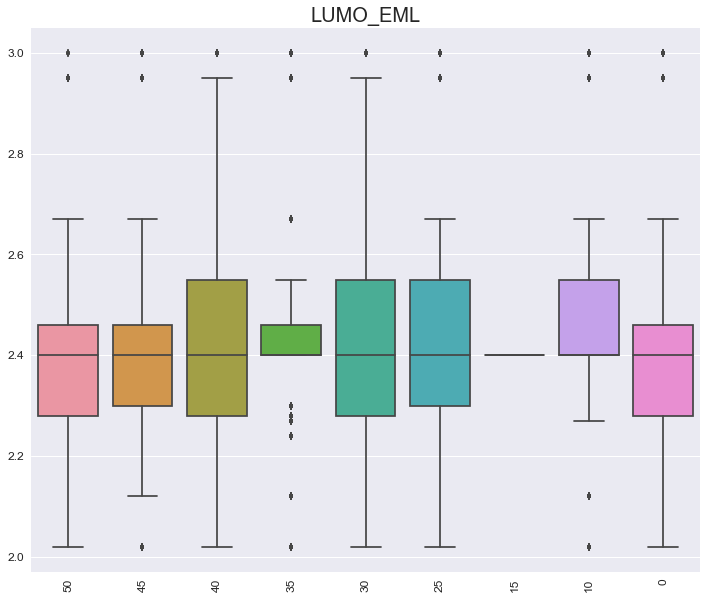

In [54]:
layer('LUMO_EML')

,50,45,40,35,30,25,15,10,0
count,570.000000,8540.000000,18400.000000,3816.000000,40202.000000,5272.000000,40.0,1733.000000,12627.000000
mean,6.016982,6.032044,5.847450,6.305487,5.872444,5.868179,7.5,6.525563,5.816488
std,0.612476,0.586303,0.220397,0.795644,0.315292,0.091759,0.0,0.789139,0.120877
min,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,7.5,5.560000,5.560000
25%,5.700000,5.710000,5.800000,5.710000,5.710000,5.850000,7.5,5.900000,5.710000
50%,5.800000,5.900000,5.860000,5.900000,5.860000,5.900000,7.5,6.060000,5.850000
75%,5.900000,5.900000,5.900000,7.500000,5.900000,5.900000,7.5,7.500000,5.900000
max,7.500000,7.500000,7.500000,7.500000,7.500000,6.060000,7.5,7.500000,6.060000


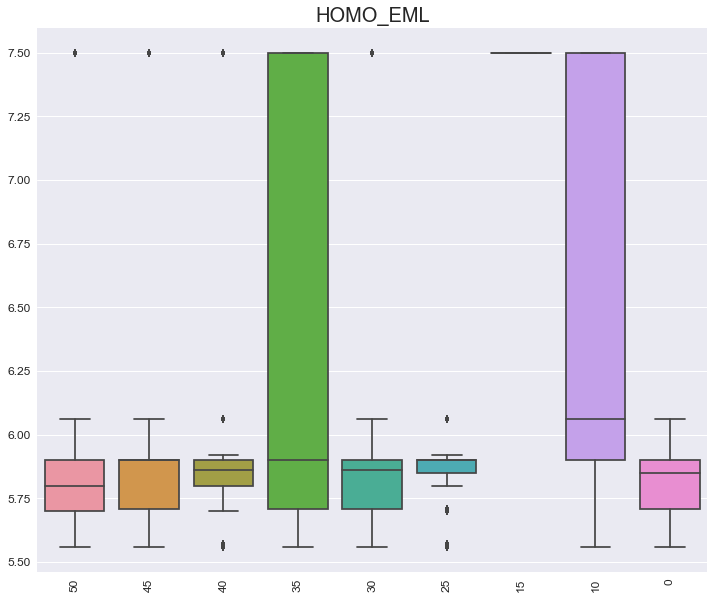

In [55]:
layer('HOMO_EML')

In [56]:
triplet3 = new_X.loc[new_X['triplet_HOST'] == 2.85]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,15,10,0
count,416.000000,5509.000000,17327.000000,2646.000000,33937.000000,5445.000000,0.0,811.000000,11429.000000
mean,2.311010,2.296453,2.247693,2.265571,2.269835,2.164408,NaN,2.282145,2.255751
std,0.147267,0.165544,0.205416,0.192676,0.184714,0.263191,NaN,0.190414,0.199611
min,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,NaN,1.900000,1.900000
25%,2.260000,2.200000,2.000000,2.200000,2.200000,1.900000,NaN,2.200000,2.000000
50%,2.400000,2.400000,2.260000,2.400000,2.400000,2.000000,NaN,2.400000,2.260000
75%,2.400000,2.400000,2.400000,2.400000,2.400000,2.500000,NaN,2.400000,2.400000
max,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,NaN,2.500000,2.500000


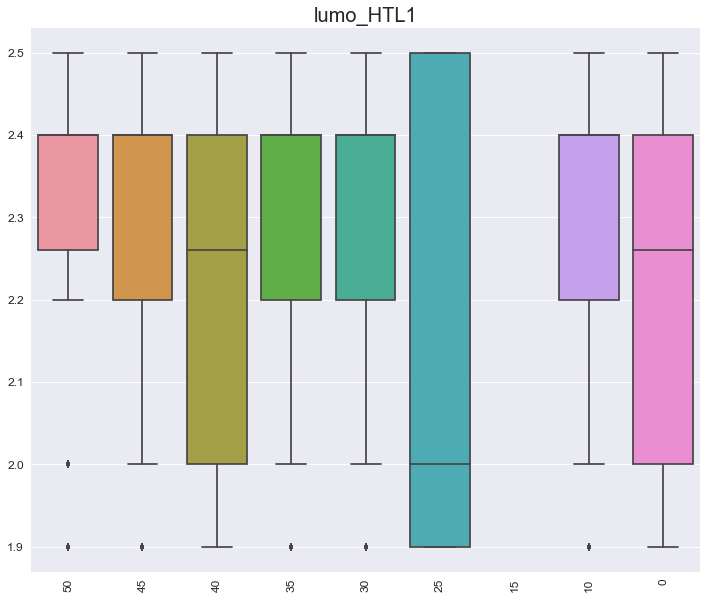

In [57]:
layer('lumo_HTL1')

,50,45,40,35,30,25,15,10,0
count,416.000000,5509.000000,17327.000000,2646.000000,33937.000000,5445.000000,0.0,811.000000,11429.000000
mean,5.823077,5.810982,5.686957,5.741043,5.763636,5.353113,NaN,5.739211,5.710605
std,0.177659,0.185732,0.245694,0.258030,0.183183,0.270099,NaN,0.223698,0.243220
min,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,NaN,5.100000,5.100000
25%,5.800000,5.800000,5.700000,5.700000,5.800000,5.100000,NaN,5.700000,5.700000
50%,5.800000,5.800000,5.800000,5.800000,5.800000,5.200000,NaN,5.800000,5.800000
75%,5.900000,5.800000,5.800000,5.800000,5.800000,5.500000,NaN,5.800000,5.800000
max,6.100000,6.100000,6.100000,6.100000,6.100000,5.900000,NaN,6.100000,6.100000


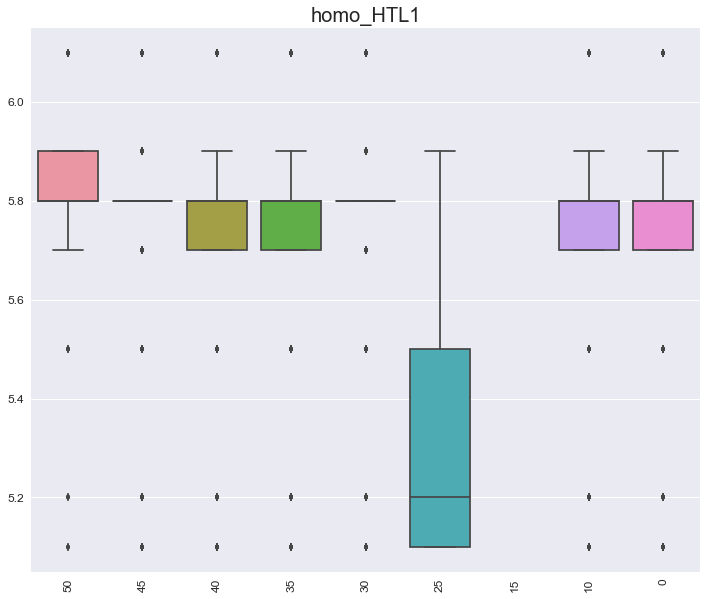

In [58]:
layer('homo_HTL1')

,50,45,40,35,30,25,15,10,0
count,416.000000,5509.000000,17327.000000,2646.000000,33937.000000,5445.000000,0.0,811.000000,11429.000000
mean,2.843750,2.804981,2.754570,2.766504,2.782582,2.611434,NaN,2.775573,2.761572
std,0.155444,0.189624,0.226439,0.209756,0.210783,0.232762,NaN,0.229585,0.219584
min,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,NaN,2.300000,2.300000
25%,2.800000,2.800000,2.580000,2.670000,2.670000,2.300000,NaN,2.670000,2.580000
50%,2.870000,2.870000,2.870000,2.800000,2.870000,2.670000,NaN,2.870000,2.800000
75%,2.940000,2.940000,2.940000,2.940000,2.940000,2.870000,NaN,2.940000,2.940000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,3.000000,3.000000


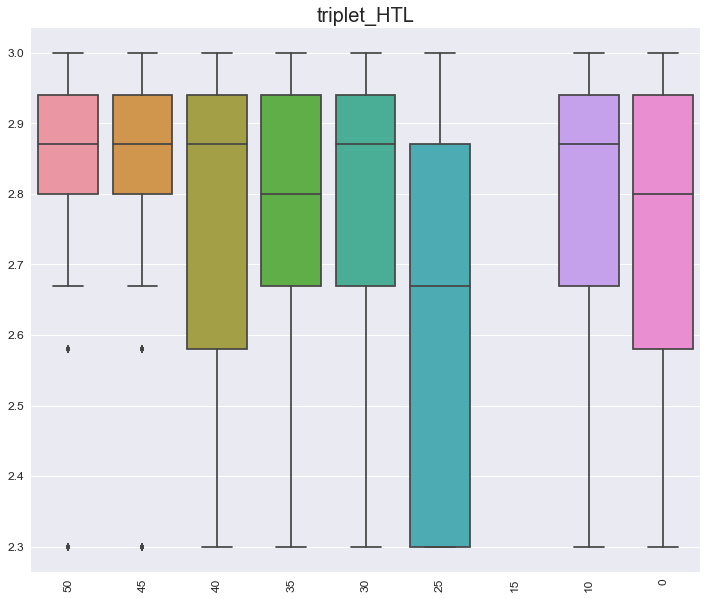

In [59]:
layer('triplet_HTL')

,50,45,40,35,30,25,15,10,0
count,4.160000e+02,5509.000000,17327.000000,2646.000000,33937.000000,5445.000000,0.0,811.000000,11429.000000
mean,3.470000e+00,2.749310,2.845950,3.023772,2.733748,2.845668,NaN,3.132552,3.097690
std,2.223120e-14,0.381648,0.313795,0.447801,0.263834,0.233529,NaN,0.301847,0.293745
min,3.470000e+00,2.260000,2.260000,2.260000,2.260000,2.260000,NaN,2.800000,2.800000
25%,3.470000e+00,2.500000,2.700000,2.520000,2.520000,2.730000,NaN,2.800000,2.800000
50%,3.470000e+00,2.600000,2.750000,3.200000,2.730000,2.880000,NaN,3.000000,3.000000
75%,3.470000e+00,2.880000,2.910000,3.470000,2.880000,2.910000,NaN,3.500000,3.500000
max,3.470000e+00,3.470000,3.470000,3.470000,3.320000,3.320000,NaN,3.500000,3.500000


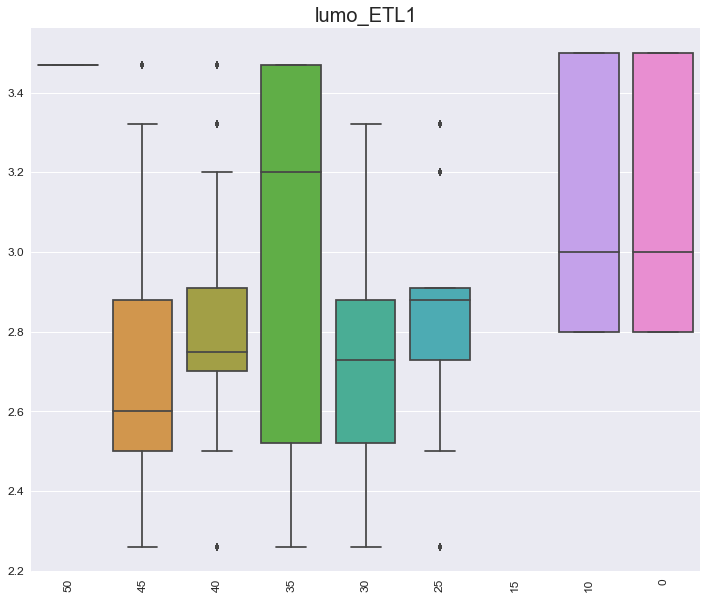

In [60]:
layer('lumo_ETL1')

,50,45,40,35,30,25,15,10,0
count,416.0,5509.000000,17327.000000,2646.000000,33937.000000,5445.000000,0.0,811.000000,11429.000000
mean,7.5,6.651988,6.531829,7.042729,6.460674,6.322246,NaN,6.571147,6.530650
std,0.0,0.499495,0.440101,0.470766,0.340874,0.324278,NaN,0.349117,0.339144
min,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,NaN,6.200000,6.200000
25%,7.5,6.300000,6.120000,6.790000,6.130000,6.020000,NaN,6.200000,6.200000
50%,7.5,6.680000,6.560000,6.800000,6.500000,6.300000,NaN,6.400000,6.400000
75%,7.5,6.800000,6.790000,7.500000,6.790000,6.560000,NaN,7.000000,7.000000
max,7.5,7.500000,7.500000,7.500000,7.000000,7.000000,NaN,7.000000,7.000000


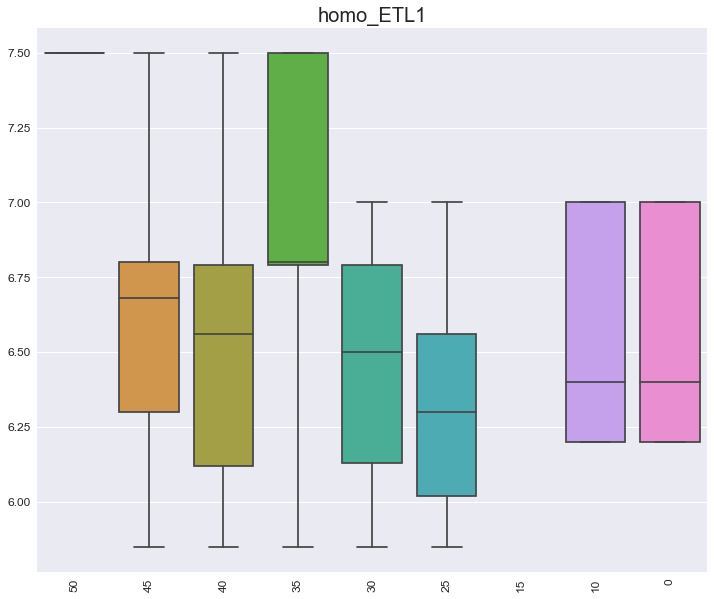

In [61]:
layer('homo_ETL1')

,50,45,40,35,30,25,15,10,0
count,4.160000e+02,5509.000000,17327.000000,2646.000000,33937.000000,5445.000000,0.0,811.000000,11429.000000
mean,2.990000e+00,2.906900,2.835109,2.983745,2.840683,2.769745,NaN,2.568804,2.566515
std,8.003231e-15,0.256024,0.198149,0.228227,0.228200,0.108597,NaN,0.046358,0.047196
min,2.990000e+00,2.690000,2.690000,2.690000,2.690000,2.690000,NaN,2.500000,2.500000
25%,2.990000e+00,2.700000,2.700000,2.760000,2.700000,2.700000,NaN,2.500000,2.500000
50%,2.990000e+00,2.760000,2.750000,2.990000,2.750000,2.750000,NaN,2.600000,2.600000
75%,2.990000e+00,2.990000,2.950000,2.990000,2.800000,2.760000,NaN,2.600000,2.600000
max,2.990000e+00,3.400000,3.400000,3.400000,3.400000,3.400000,NaN,2.600000,2.600000


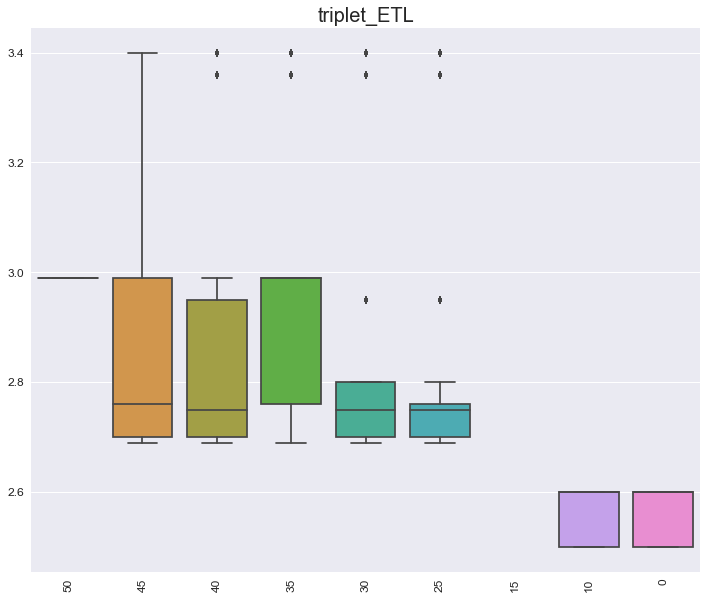

In [62]:
layer('triplet_ETL')

,50,45,40,35,30,25,15,10,0
count,416.000000,5509.000000,17327.000000,2646.000000,33937.000000,5445.000000,0.0,811.000000,11429.000000
mean,2.403125,2.409862,2.421778,2.424225,2.418386,2.419792,NaN,2.426227,2.418298
std,0.216838,0.232919,0.258450,0.201196,0.258320,0.216886,NaN,0.120866,0.257481
min,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,NaN,2.120000,2.020000
25%,2.300000,2.300000,2.270000,2.300000,2.280000,2.300000,NaN,2.400000,2.270000
50%,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,NaN,2.400000,2.300000
75%,2.460000,2.460000,2.550000,2.460000,2.460000,2.550000,NaN,2.400000,2.460000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,2.950000,3.000000


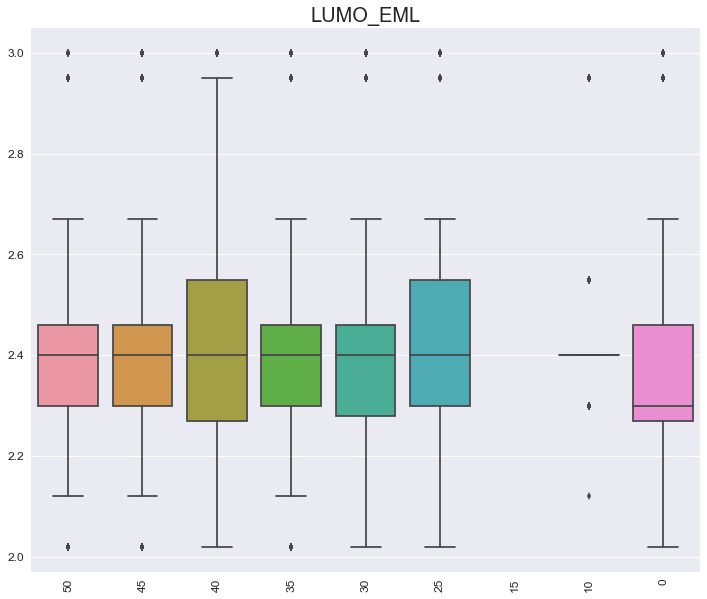

In [63]:
layer('LUMO_EML')

,50,45,40,35,30,25,15,10,0
count,416.000000,5509.000000,17327.000000,2646.000000,33937.000000,5445.000000,0.0,811.000000,11429.000000
mean,6.102933,6.125395,5.837745,6.391028,5.877153,5.850020,NaN,7.305561,5.808451
std,0.693697,0.691942,0.245595,0.813157,0.369931,0.105595,NaN,0.513942,0.138670
min,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,NaN,5.570000,5.560000
25%,5.700000,5.710000,5.710000,5.800000,5.700000,5.800000,NaN,7.500000,5.700000
50%,5.800000,5.850000,5.850000,5.900000,5.800000,5.900000,NaN,7.500000,5.800000
75%,6.060000,5.920000,5.900000,7.500000,5.900000,5.900000,NaN,7.500000,5.900000
max,7.500000,7.500000,7.500000,7.500000,7.500000,6.060000,NaN,7.500000,7.500000


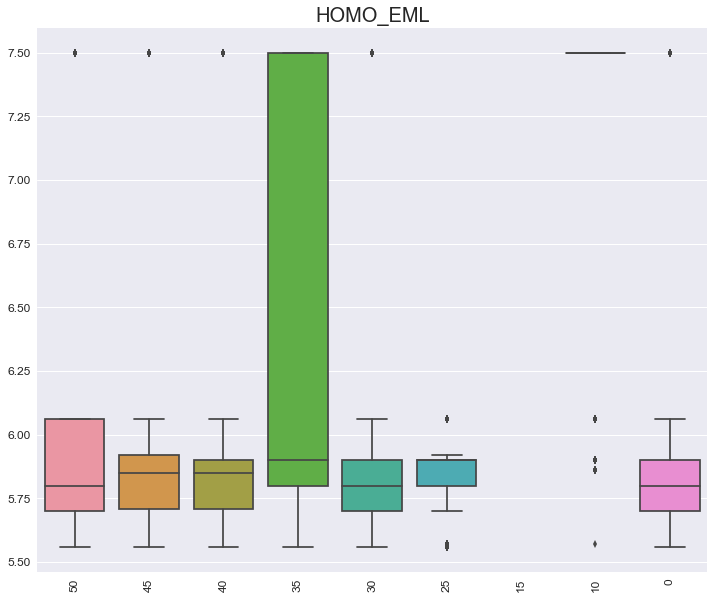

In [64]:
layer('HOMO_EML')

In [65]:
triplet3 = new_X.loc[new_X['triplet_HOST'] == 2.8]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,15,10,0
count,440.000000,5043.000000,19110.000000,2479.000000,35597.000000,6451.000000,0.0,798.000000,12162.000000
mean,2.313227,2.298199,2.249159,2.258459,2.272252,2.164824,NaN,2.279975,2.256025
std,0.144356,0.168093,0.203498,0.199636,0.183248,0.257888,NaN,0.191137,0.199546
min,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,NaN,1.900000,1.900000
25%,2.260000,2.200000,2.000000,2.200000,2.200000,1.900000,NaN,2.200000,2.000000
50%,2.400000,2.400000,2.260000,2.400000,2.400000,2.000000,NaN,2.400000,2.260000
75%,2.400000,2.400000,2.400000,2.400000,2.400000,2.500000,NaN,2.400000,2.400000
max,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,NaN,2.500000,2.500000


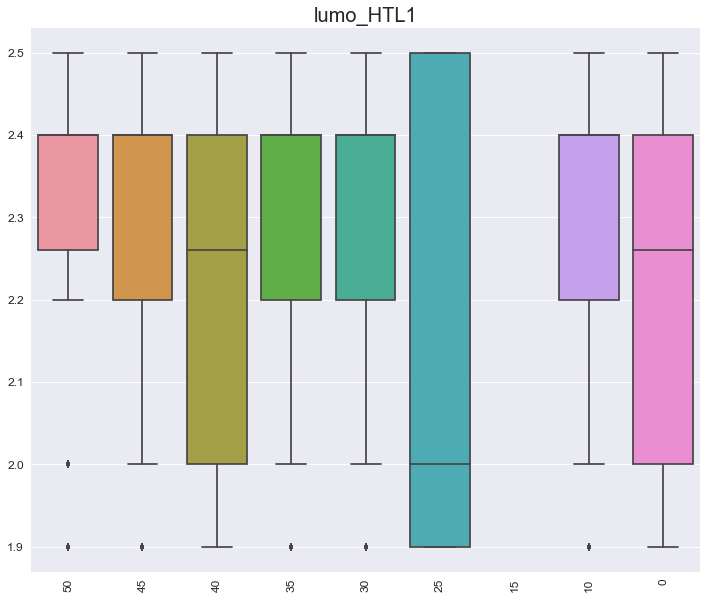

In [66]:
layer('lumo_HTL1')

,50,45,40,35,30,25,15,10,0
count,440.000000,5043.000000,19110.000000,2479.000000,35597.000000,6451.000000,0.0,798.000000,12162.000000
mean,5.827500,5.809221,5.692501,5.721017,5.766874,5.384979,NaN,5.737093,5.710886
std,0.173384,0.195720,0.243059,0.264174,0.181071,0.283028,NaN,0.224648,0.243092
min,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,NaN,5.100000,5.100000
25%,5.800000,5.800000,5.700000,5.700000,5.800000,5.100000,NaN,5.700000,5.700000
50%,5.800000,5.800000,5.800000,5.800000,5.800000,5.200000,NaN,5.800000,5.800000
75%,5.900000,5.800000,5.800000,5.800000,5.800000,5.700000,NaN,5.800000,5.800000
max,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,NaN,6.100000,6.100000


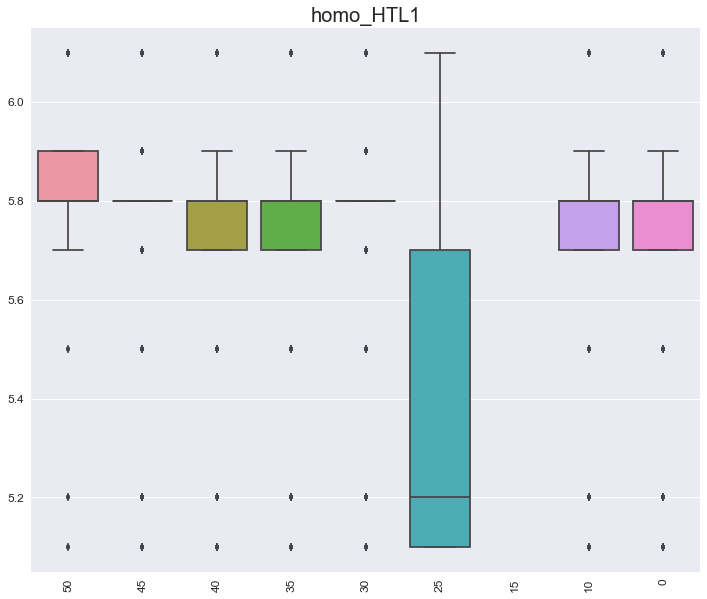

In [67]:
layer('homo_HTL1')

,50,45,40,35,30,25,15,10,0
count,440.000000,5043.000000,19110.000000,2479.000000,35597.000000,6451.000000,0.0,798.000000,12162.000000
mean,2.847841,2.800317,2.757453,2.752941,2.784325,2.625309,NaN,2.773922,2.761751
std,0.151292,0.192755,0.224793,0.216698,0.210306,0.233077,NaN,0.228837,0.219694
min,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,NaN,2.300000,2.300000
25%,2.800000,2.800000,2.580000,2.580000,2.670000,2.300000,NaN,2.670000,2.580000
50%,2.940000,2.800000,2.870000,2.800000,2.870000,2.670000,NaN,2.870000,2.800000
75%,2.940000,2.940000,2.940000,2.940000,2.940000,2.870000,NaN,2.940000,2.940000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,3.000000,3.000000


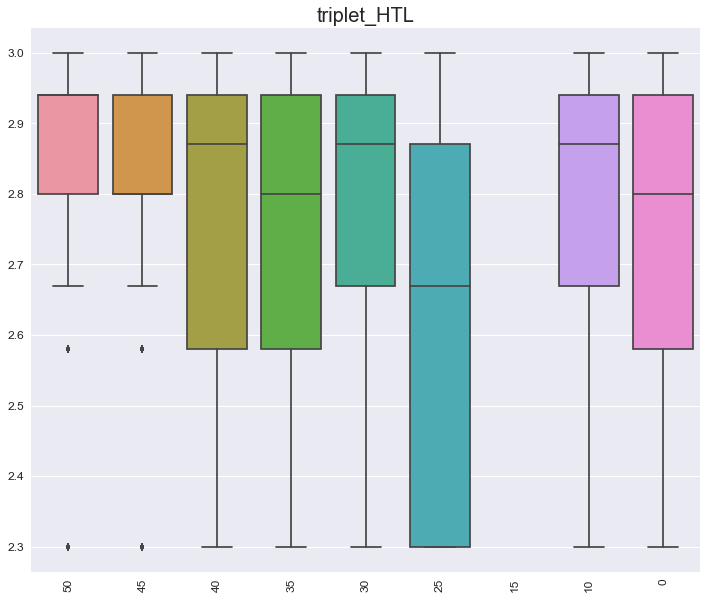

In [68]:
layer('triplet_HTL')

,50,45,40,35,30,25,15,10,0
count,4.400000e+02,5043.000000,19110.000000,2479.000000,35597.000000,6451.000000,0.0,798.000000,12162.000000
mean,3.470000e+00,2.764634,2.837052,3.088088,2.730001,2.847292,NaN,3.131328,3.097944
std,2.267433e-14,0.402185,0.311121,0.443565,0.264475,0.225232,NaN,0.301350,0.293838
min,3.470000e+00,2.260000,2.260000,2.260000,2.260000,2.260000,NaN,2.800000,2.800000
25%,3.470000e+00,2.500000,2.700000,2.600000,2.520000,2.730000,NaN,2.800000,2.800000
50%,3.470000e+00,2.600000,2.750000,3.470000,2.700000,2.880000,NaN,3.000000,3.000000
75%,3.470000e+00,2.910000,2.910000,3.470000,2.880000,2.910000,NaN,3.500000,3.500000
max,3.470000e+00,3.470000,3.470000,3.470000,3.320000,3.320000,NaN,3.500000,3.500000


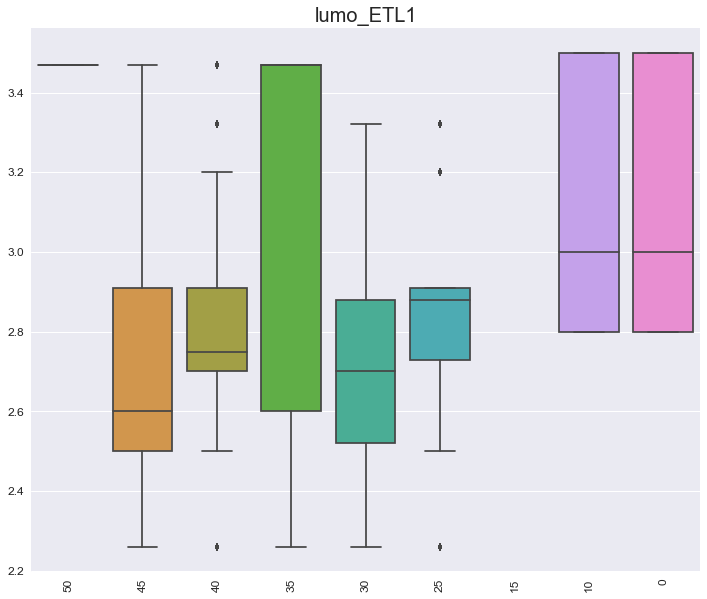

In [69]:
layer('lumo_ETL1')

,50,45,40,35,30,25,15,10,0
count,440.0,5043.000000,19110.000000,2479.000000,35597.000000,6451.000000,0.0,798.000000,12162.000000
mean,7.5,6.701624,6.522366,7.117430,6.466729,6.308267,NaN,6.569674,6.530949
std,0.0,0.507597,0.435348,0.446339,0.340096,0.319697,NaN,0.348552,0.339254
min,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,NaN,6.200000,6.200000
25%,7.5,6.500000,6.120000,6.800000,6.130000,6.020000,NaN,6.200000,6.200000
50%,7.5,6.790000,6.500000,7.500000,6.500000,6.130000,NaN,6.400000,6.400000
75%,7.5,6.800000,6.790000,7.500000,6.790000,6.560000,NaN,7.000000,7.000000
max,7.5,7.500000,7.500000,7.500000,7.000000,7.000000,NaN,7.000000,7.000000


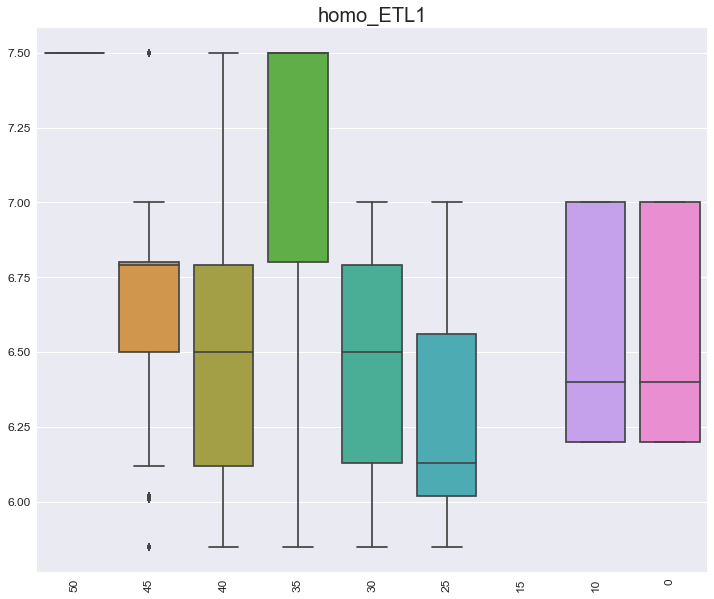

In [70]:
layer('homo_ETL1')

,50,45,40,35,30,25,15,10,0
count,4.400000e+02,5043.000000,19110.000000,2479.000000,35597.000000,6451.000000,0.0,798.000000,12162.000000
mean,2.990000e+00,2.930642,2.831598,2.997148,2.843306,2.765435,NaN,2.568546,2.566543
std,8.002705e-15,0.262548,0.196545,0.213281,0.230848,0.100277,NaN,0.046462,0.047186
min,2.990000e+00,2.690000,2.690000,2.690000,2.690000,2.690000,NaN,2.500000,2.500000
25%,2.990000e+00,2.700000,2.700000,2.800000,2.700000,2.700000,NaN,2.500000,2.500000
50%,2.990000e+00,2.800000,2.750000,2.990000,2.750000,2.750000,NaN,2.600000,2.600000
75%,2.990000e+00,2.990000,2.800000,2.990000,2.800000,2.750000,NaN,2.600000,2.600000
max,2.990000e+00,3.400000,3.400000,3.400000,3.400000,3.400000,NaN,2.600000,2.600000


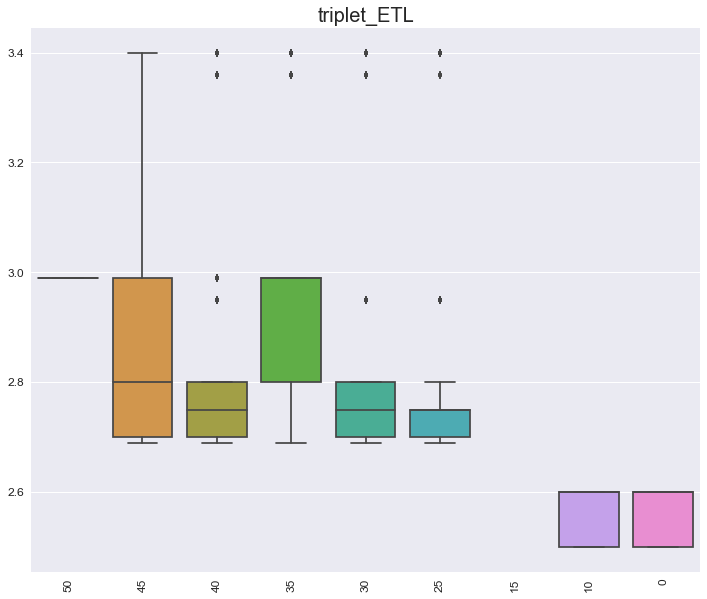

In [71]:
layer('triplet_ETL')

,50,45,40,35,30,25,15,10,0
count,440.000000,5043.000000,19110.000000,2479.000000,35597.000000,6451.000000,0.0,798.000000,12162.000000
mean,2.388273,2.409633,2.401050,2.407019,2.402558,2.397159,NaN,2.425050,2.400724
std,0.226076,0.231043,0.260739,0.196496,0.260808,0.222622,NaN,0.117259,0.259486
min,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,NaN,2.120000,2.020000
25%,2.280000,2.300000,2.270000,2.300000,2.270000,2.270000,NaN,2.400000,2.270000
50%,2.400000,2.400000,2.300000,2.400000,2.300000,2.300000,NaN,2.400000,2.300000
75%,2.460000,2.460000,2.460000,2.400000,2.460000,2.460000,NaN,2.400000,2.460000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,2.950000,3.000000


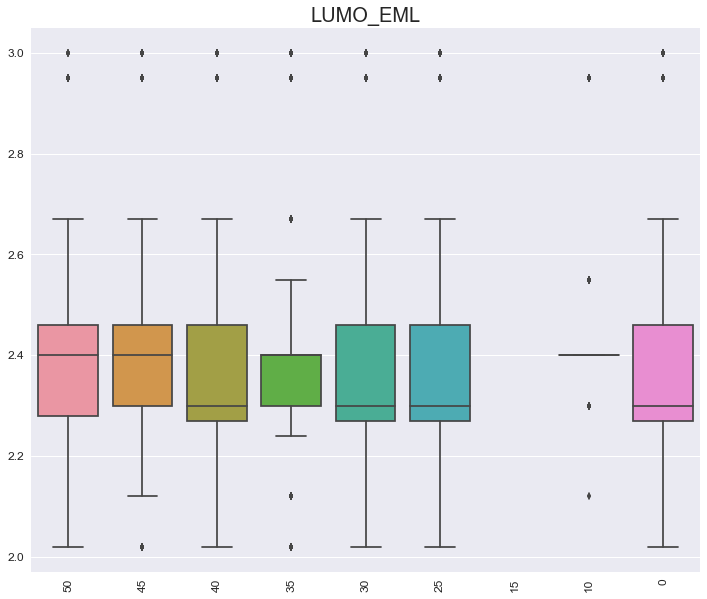

In [72]:
layer('LUMO_EML')

,50,45,40,35,30,25,15,10,0
count,440.000000,5043.000000,19110.000000,2479.000000,35597.000000,6451.000000,0.0,798.000000,12162.000000
mean,6.072568,6.160002,5.817336,6.382182,5.863354,5.827723,NaN,7.327644,5.794486
std,0.686345,0.714796,0.242644,0.811369,0.375077,0.123107,NaN,0.487911,0.145802
min,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,NaN,5.570000,5.560000
25%,5.700000,5.710000,5.700000,5.800000,5.700000,5.800000,NaN,7.500000,5.700000
50%,5.800000,5.860000,5.800000,5.900000,5.800000,5.860000,NaN,7.500000,5.800000
75%,5.905000,6.060000,5.900000,7.500000,5.900000,5.900000,NaN,7.500000,5.900000
max,7.500000,7.500000,7.500000,7.500000,7.500000,6.060000,NaN,7.500000,7.500000


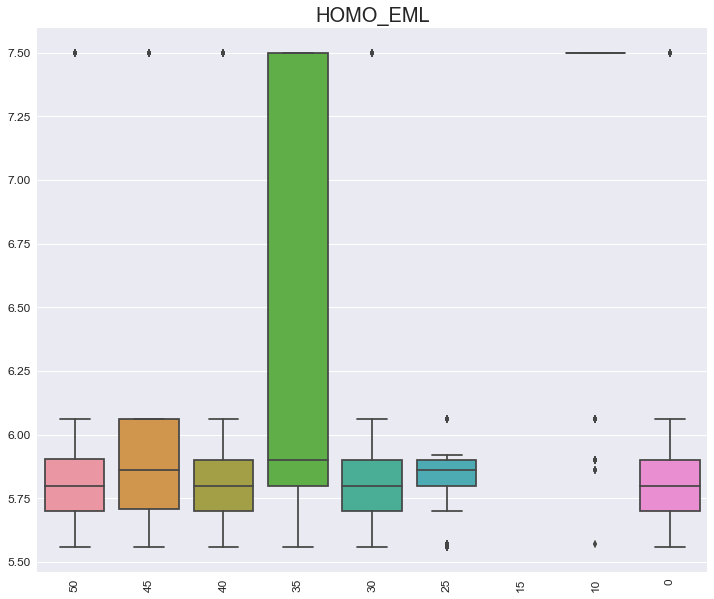

In [73]:
layer('HOMO_EML')

In [89]:
from openpyxl import load_workbook
new_X = new_X[230000:]

new_X.to_csv('C:/Anaconda3/projects/oled/fix triplet host and HTL homo/generated1.csv', header=new_X.columns, 
             index=None, sep=',')

In [113]:
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

df = pd.read_csv('C:/Anaconda3/projects/oled/fix triplet host and HTL homo/generated.csv') 
x = df['triplet_HTL']
y= df['triplet_ETL']
z = df['cd/a']


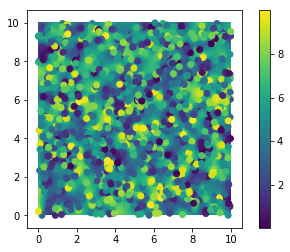

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

# Generate data:
x, y, z = 10 * np.random.random((3,1000))

# Set up a regular grid of interpolation points
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
plt.scatter(x, y, c=z)
plt.colorbar()
plt.show()


In [19]:
triplet3 = new_X.loc[new_X['triplet_HOST'] == 2.85]
triplet3 = triplet3[['triplet_HTL', 'triplet_ETL', 'cd/a']]

triplet3.shape


triplet3.to_csv('C:/Anaconda3/projects/oled/fix triplet host and HTL homo/triplet2.85.csv', header=triplet3.columns, 
             index=None, sep=',')